# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from lightgbm import LGBMClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### LightGBM

In [3]:
lgbm_model = LGBMClassifier(
    objective='binary',
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

In [4]:
param_distributions_lgb = {
    'num_leaves': [20, 31, 40, 50, 60, 70],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [-1, 5, 10, 15, 20],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.05, 0.1],
    'reg_lambda': [0, 0.01, 0.05, 0.1],
}

In [5]:
df_lgb, model_lgb, params_lgb = runner.search_params(
    model=lgbm_model,
    params=param_distributions_lgb,
    X_train=X_train,
    Y_train=Y_train,
    max_combinations=1000
)

Num combinações de hiperparâmetros: 1000
Iniciando busca por hiperparâmetros...
[LightGBM] [Info] Number of positive: 8157, number of negative: 11364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 19521, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417858 -> initscore=-0.331574
[LightGBM] [Info] Start training from score -0.331574
Melhor conjunto de hiperparâmetros encontrado: {'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0, 'num_leaves': 40, 'n_estimators': 250, 'min_child_samples': 20, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Tempo de busca: 12.86s


Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 6525, number of negative: 9091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 15616, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417841 -> initscore=-0.331644
[LightGBM] [Info] Start training from score -0.331644


Cross-Validation (5-folds):  20%|██        | 1/5 [00:00<00:01,  2.80it/s]

[LightGBM] [Info] Number of positive: 6525, number of negative: 9092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 15617, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417814 -> initscore=-0.331754
[LightGBM] [Info] Start training from score -0.331754


Cross-Validation (5-folds):  40%|████      | 2/5 [00:00<00:01,  2.79it/s]

[LightGBM] [Info] Number of positive: 6526, number of negative: 9091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 15617, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417878 -> initscore=-0.331491
[LightGBM] [Info] Start training from score -0.331491


Cross-Validation (5-folds):  60%|██████    | 3/5 [00:01<00:00,  2.94it/s]

[LightGBM] [Info] Number of positive: 6526, number of negative: 9091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 15617, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417878 -> initscore=-0.331491
[LightGBM] [Info] Start training from score -0.331491


Cross-Validation (5-folds):  80%|████████  | 4/5 [00:01<00:00,  2.94it/s]

[LightGBM] [Info] Number of positive: 6526, number of negative: 9091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 15617, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417878 -> initscore=-0.331491
[LightGBM] [Info] Start training from score -0.331491


Cross-Validation (5-folds): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]


In [6]:
df_lgb

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
2,3,0.911729,0.980041,0.914959,0.980790,0.897594,0.976980,0.892091,0.975483,"[0.0, 0.0686317641882974, 1.0]","[0.0, 0.8920907418761496, 1.0]"
4,5,0.911856,0.979295,0.914703,0.980022,0.897570,0.976066,0.894543,0.974870,"[0.0, 0.0708315002199736, 1.0]","[0.0, 0.894543225015328, 1.0]"
1,2,0.910159,0.979581,0.912910,0.980406,0.895577,0.976505,0.893382,0.974559,"[0.0, 0.07306338028169014, 1.0]","[0.0, 0.8933823529411765, 1.0]"
0,1,0.908479,0.979985,0.912164,0.980725,0.893972,0.976901,0.886029,0.975479,"[0.0, 0.06907171139463264, 1.0]","[0.0, 0.8860294117647058, 1.0]"
3,4,0.900279,0.979362,0.903945,0.980150,0.884224,0.976209,0.877989,0.974563,"[0.0, 0.0774307083150022, 1.0]","[0.0, 0.8779889638258737, 1.0]"


In [7]:
runner.save_model(model_lgb, "lightGBM")
runner.save_results(df_lgb, "lightGBM")

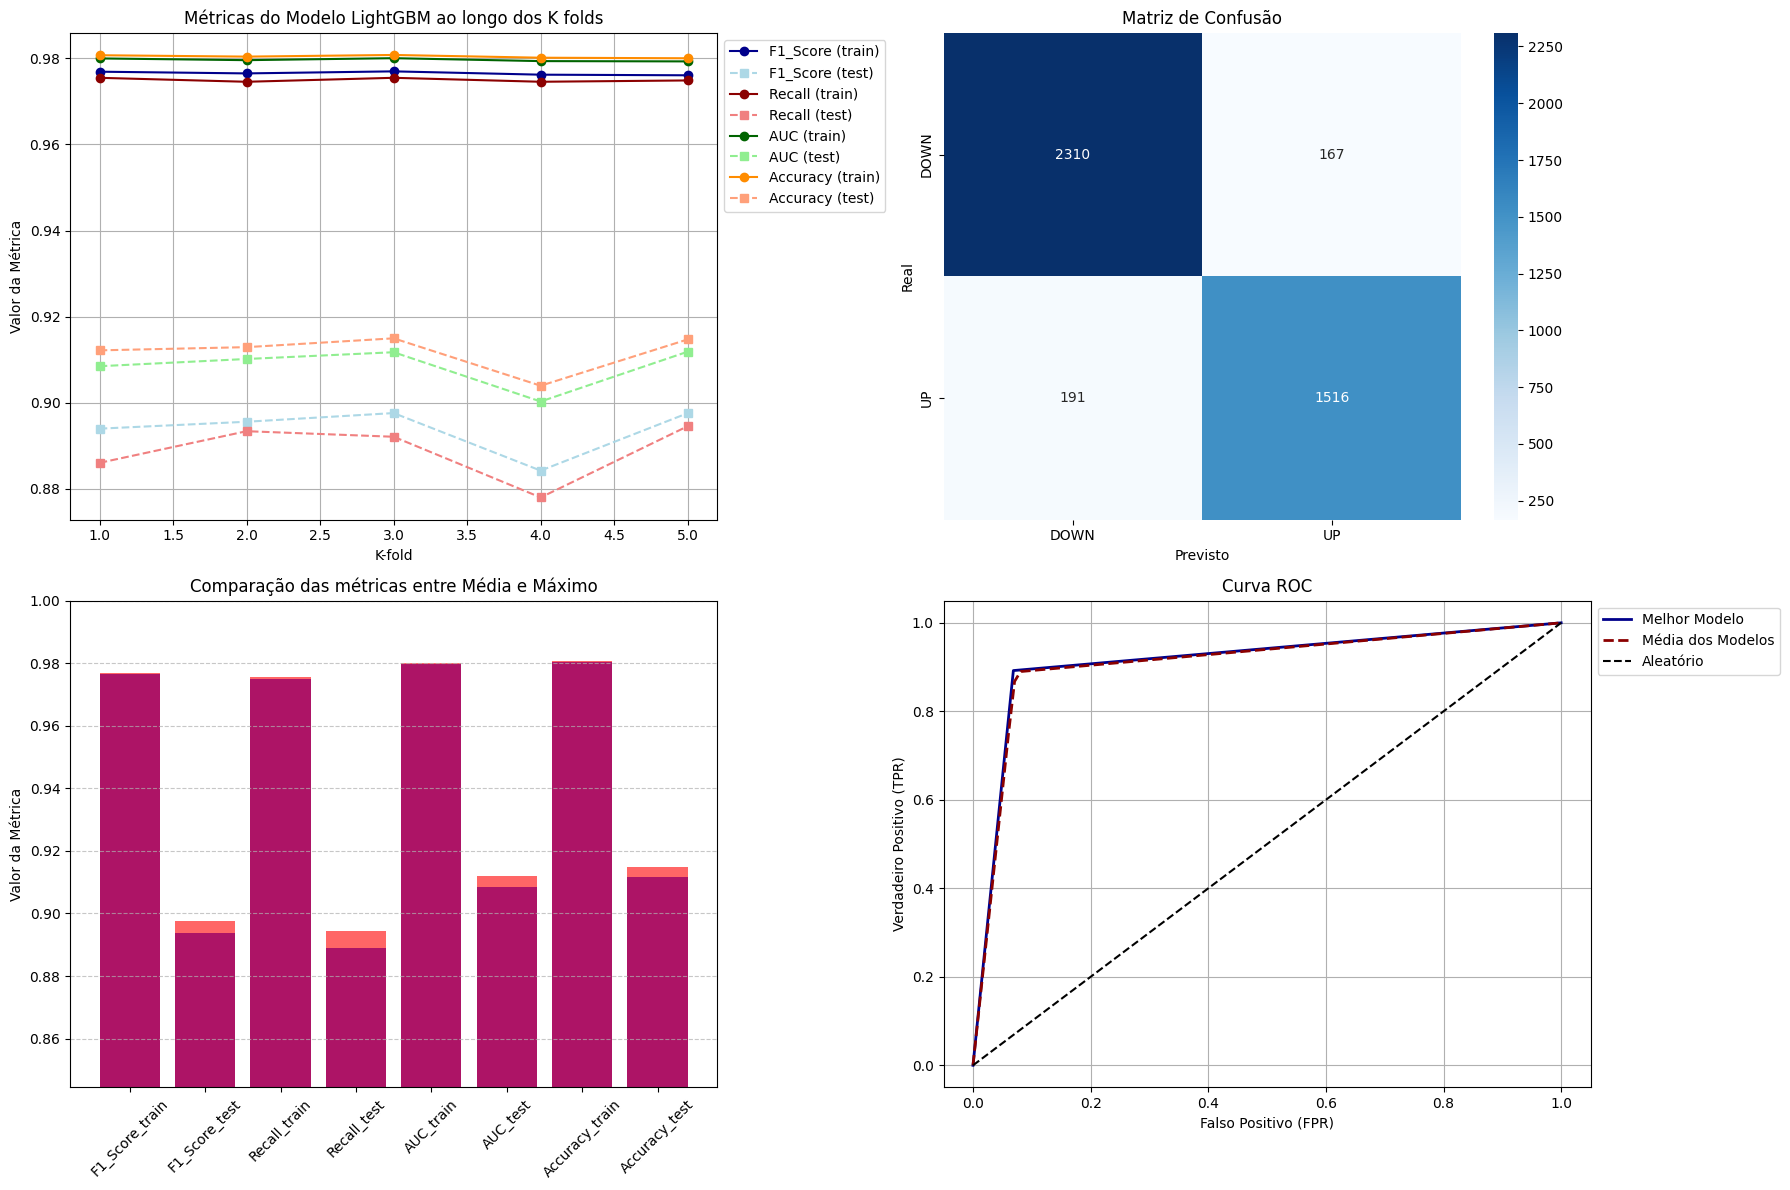

In [8]:
plots.model_evaluate(model_lgb, df_lgb, X_test, Y_test, model_name="LightGBM")